DEEP REINFORCEMENT LEARNING EXPLAINED - 15 - 16 - 17  
- https://towardsdatascience.com/deep-q-network-dqn-i-bce08bdf2af  
- https://towardsdatascience.com/deep-q-network-dqn-ii-b6bf911b6b2c
- https://towardsdatascience.com/deep-q-network-dqn-iii-c5a83b0338d2

# **Deep Q-Network (DQN)**

## Seed

### seed fixed

In [37]:
import random
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import gym


def seed_everything(env, seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore
    env.seed(seed)
    env.action_space.seed(seed)
    torch.backends.cudnn.benchmark = False
#     torch.use_deterministic_algorithms(True)

    
    
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        
        self.out = 0
        
        self.fc = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )
        
        self.optimizer = optim.Adam(self.parameters(), lr=0.0001)
        
    def forward(self, x):
        self.out = self.fc(x)
        return self.out
    
    def train(self):
        x = torch.rand(4)
        x = torch.tensor(x, requires_grad=True)
                
        loss = self.out
        loss /= 10
        loss = loss.mean()
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        return loss

### seed test

In [2]:
def seed_test(env, device=torch.device("cpu")):
    print(device)
    import warnings
    warnings.filterwarnings(action='ignore')

    model = TestModel()

    print("random.random() :", random.random())
    print("np.random.rand() :", np.random.rand())
    print("torch.rand(1) :", torch.rand(1))

    print()

    for i in range(100):
        x = torch.rand(4)
        x = torch.tensor(x, requires_grad=True)

        model(x)
        loss = model.train()

    print("model(x) :", model(x))
    print("loss :", loss)


    print(np.random.choice(100, 7, replace=False))
    
    env.reset()
    for _ in range(10):
        env.reset()
        print(env.action_space.sample(), end=" ")
        
    print()
    print()


#### cpu

In [3]:
env = gym.make('Pong-v0')

seed_everything(env)

seed_test(env)

cpu
random.random() : 0.6394267984578837
np.random.rand() : 0.3745401188473625
torch.rand(1) : tensor([0.7945])

model(x) : tensor([-2.6099, -2.4355, -2.7988], grad_fn=<AddBackward0>)
loss : tensor(-0.2533, grad_fn=<MeanBackward0>)
[84 55 66 67 45 39 22]
3 1 5 5 5 3 2 2 0 0 



In [4]:
env = gym.make('Pong-v0')

seed_everything(env)

seed_test(env)

cpu
random.random() : 0.6394267984578837
np.random.rand() : 0.3745401188473625
torch.rand(1) : tensor([0.7945])

model(x) : tensor([-2.6099, -2.4355, -2.7988], grad_fn=<AddBackward0>)
loss : tensor(-0.2533, grad_fn=<MeanBackward0>)
[84 55 66 67 45 39 22]
3 1 5 5 5 3 2 2 0 0 



#### cuda

In [5]:
env = gym.make('Pong-v0')
seed_everything(env)

device = device = torch.device("cuda:1") if torch.cuda.is_available() else torch.device("cpu")
seed_test(env, device)

cuda:1
random.random() : 0.6394267984578837
np.random.rand() : 0.3745401188473625
torch.rand(1) : tensor([0.7945])

model(x) : tensor([-2.6099, -2.4355, -2.7988], grad_fn=<AddBackward0>)
loss : tensor(-0.2533, grad_fn=<MeanBackward0>)
[84 55 66 67 45 39 22]
3 1 5 5 5 3 2 2 0 0 



In [6]:
env = gym.make('Pong-v0')
seed_everything(env)

device = device = torch.device("cuda:1") if torch.cuda.is_available() else torch.device("cpu")
seed_test(env, device)

cuda:1
random.random() : 0.6394267984578837
np.random.rand() : 0.3745401188473625
torch.rand(1) : tensor([0.7945])

model(x) : tensor([-2.6099, -2.4355, -2.7988], grad_fn=<AddBackward0>)
loss : tensor(-0.2533, grad_fn=<MeanBackward0>)
[84 55 66 67 45 39 22]
3 1 5 5 5 3 2 2 0 0 



## OpenAI Pong

In [7]:
import gym
import gym.spaces

DEFAULT_ENV_NAME = "PongNoFrameskip-v4" 
test_env = gym.make(DEFAULT_ENV_NAME)
print(test_env.action_space.n)

6


In [8]:
print(test_env.unwrapped.get_action_meanings())

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


In [9]:
print(test_env.observation_space.shape)

(210, 160, 3)



Type of hardware accelerator provided by Colab

In [10]:
!nvidia-smi 

Thu Aug 05 03:57:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.81       Driver Version: 456.81       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX          WDDM  | 00000000:02:00.0  On |                  N/A |
|  0%   45C    P0   149W / 280W |   3142MiB / 24576MiB |     64%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX          WDDM  | 00000000:21:00.0  On |                  N/A |
|  0%   

In [11]:
import warnings
warnings.filterwarnings('ignore')

## OpenAI Gym Wrappers

In [12]:
# Taken from 
# https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On/blob/master/Chapter06/lib/wrappers.py

import cv2
import numpy as np
import collections

class FireResetEnv(gym.Wrapper):
    def __init__(self, env=None):
        super(FireResetEnv, self).__init__(env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3

    def step(self, action):
        return self.env.step(action)

    def reset(self):
        self.env.reset()
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset()
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset()
        return obs

class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env=None, skip=4):
        super(MaxAndSkipEnv, self).__init__(env)
        # most recent raw observations (for max pooling across time steps)
        self._obs_buffer = collections.deque(maxlen=2)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        done = None
        for _ in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            self._obs_buffer.append(obs)
            total_reward += reward
            if done:
                break
        max_frame = np.max(np.stack(self._obs_buffer), axis=0)
        return max_frame, total_reward, done, info

    def reset(self):
        self._obs_buffer.clear()
        obs = self.env.reset()
        self._obs_buffer.append(obs)
        return obs


class ProcessFrame84(gym.ObservationWrapper):
    def __init__(self, env=None):
        super(ProcessFrame84, self).__init__(env)
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)

    def observation(self, obs):
        return ProcessFrame84.process(obs)

    @staticmethod
    def process(frame):
        if frame.size == 210 * 160 * 3:
            img = np.reshape(frame, [210, 160, 3]).astype(np.float32)
        elif frame.size == 250 * 160 * 3:
            img = np.reshape(frame, [250, 160, 3]).astype(np.float32)
        else:
            assert False, "Unknown resolution."
        img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114
        resized_screen = cv2.resize(img, (84, 110), interpolation=cv2.INTER_AREA)
        x_t = resized_screen[18:102, :]
        x_t = np.reshape(x_t, [84, 84, 1])
        return x_t.astype(np.uint8)


class BufferWrapper(gym.ObservationWrapper):
    def __init__(self, env, n_steps, dtype=np.float32):
        super(BufferWrapper, self).__init__(env)
        self.dtype = dtype
        old_space = env.observation_space
        self.observation_space = gym.spaces.Box(old_space.low.repeat(n_steps, axis=0),
                                                old_space.high.repeat(n_steps, axis=0), dtype=dtype)

    def reset(self):
        self.buffer = np.zeros_like(self.observation_space.low, dtype=self.dtype)
        return self.observation(self.env.reset())

    def observation(self, observation):
        self.buffer[:-1] = self.buffer[1:]
        self.buffer[-1] = observation
        return self.buffer


class ImageToPyTorch(gym.ObservationWrapper):
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(old_shape[-1], 
                                old_shape[0], old_shape[1]), dtype=np.float32)

    def observation(self, observation):
        return np.moveaxis(observation, 2, 0)


class ScaledFloatFrame(gym.ObservationWrapper):
    def observation(self, obs):
        return np.array(obs).astype(np.float32) / 255.0

def make_env(env_name):
    env = gym.make(env_name)
    env = MaxAndSkipEnv(env)
    env = FireResetEnv(env)
    env = ProcessFrame84(env)
    env = ImageToPyTorch(env)
    env = BufferWrapper(env, 4)
    return ScaledFloatFrame(env)

## The DQN model


In [13]:
import torch
import torch.nn as nn        # Pytorch neural network package
import torch.optim as optim  # Pytorch optimization package

device = torch.device("cuda:1") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda:1


In [14]:
# Taken from 
# https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On/blob/master/Chapter06/lib/dqn_model.py

import numpy as np

class DQN(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(DQN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )

        conv_out_size = self._get_conv_out(input_shape)
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)

In [15]:
test_env = make_env(DEFAULT_ENV_NAME)
test_net = DQN(test_env.observation_space.shape, test_env.action_space.n).to(device)
print(test_net)

DQN(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=6, bias=True)
  )
)


## Training

Load Tensorboard extension

In [16]:
# from torch.utils.tensorboard import SummaryWriter
# %load_ext tensorboard

Import required modules and define the hyperparameters

In [17]:
import time
import numpy as np
import collections


# MEAN_REWARD_BOUND = 19.0           
MEAN_REWARD_BOUND = 15.0

gamma = 0.99                   
batch_size = 32                
replay_size = 10000            
learning_rate = 1e-4           
sync_target_frames = 1000      
replay_start_size = 10000      

eps_start=1.0
eps_decay=.999985
eps_min=0.02

Experience replay buffer

In [18]:
Experience = collections.namedtuple('Experience', field_names=['state', 'action', 'reward', 'done', 'new_state'])

class ExperienceReplay:
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        states, actions, rewards, dones, next_states = zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), np.array(next_states)


Agent

In [19]:
class Agent:
    def __init__(self, env, exp_buffer):
        self.env = env
        self.exp_buffer = exp_buffer
        self._reset()

    def _reset(self):
        self.state = env.reset()
        self.total_reward = 0.0

    def play_step(self, net, epsilon=0.0, device="cpu"):

        done_reward = None
        
#         rr = np.random.random()
#         print("np.random.random() :", rr)
        if np.random.random() < epsilon:
#         if rr < epsilon:
            action = env.action_space.sample()
        else:
            state_a = np.array([self.state], copy=False)
            state_v = torch.tensor(state_a).to(device)
#             print("state_v.dtype : {}".format(state_v.dtype))
            q_vals_v = net(state_v)
#             print("q_vals_v.type : {}".format(q_vals_v.type))
            _, act_v = torch.max(q_vals_v, dim=1)
#             print("act_v.dtype : {}".format(act_v.dtype))
            action = int(act_v.item())
#             print("type(action) : {}".format(type(action)))

#         print("action :", action)

        new_state, reward, is_done, _ = self.env.step(action)
#         print(new_state.shape)
#         print(new_state[3, 30:70:5, 8])
        
        self.total_reward += reward

        exp = Experience(self.state, action, reward, is_done, new_state)
        self.exp_buffer.append(exp)
        self.state = new_state
        if is_done:
            done_reward = self.total_reward
            self._reset()
        return done_reward


In [20]:
import datetime
print(">>>Training starts at ",datetime.datetime.now())

>>>Training starts at  2021-08-05 03:57:57.444523


Main training loop

In [ ]:
import time

env = make_env(DEFAULT_ENV_NAME)

seed_everything(env)

seed_test(env, device=device)


net = DQN(env.observation_space.shape, env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape, env.action_space.n).to(device)
# writer = SummaryWriter(comment="-" + DEFAULT_ENV_NAME)
 
buffer = ExperienceReplay(replay_size)
agent = Agent(env, buffer)

epsilon = eps_start

optimizer = optim.Adam(net.parameters(), lr=learning_rate)
total_rewards = []
frame_idx = 0  
loss_t = 0

best_mean_reward = None
start_time = time.time()
train_start_time = time.time()

print_flag = True

current_time = time.strftime('%y-%m-%d/%X', time.localtime(time.time()))
print(current_time)
    
while True:
    frame_idx += 1
    epsilon = max(epsilon*eps_decay, eps_min)

    reward = agent.play_step(net, epsilon, device=device)
    if reward is not None:
        total_rewards.append(reward)

        mean_reward = np.mean(total_rewards[-100:])
        elapsed_time = time.time() - start_time
        elapsed_time = time.strftime("%S", time.gmtime(elapsed_time))

#         print("%d:  %d games, mean reward %.3f, (epsilon %.2f)" % (
#             frame_idx, len(total_rewards), mean_reward, epsilon))
        print("Frame {:6},".format(frame_idx),
              "Episode {:4},".format(len(total_rewards)),
              "Mean Reward {:.3f},".format(mean_reward),
              "Loss {:.3f},".format(loss_t),
              "Epsilon {:.2f}%,".format(epsilon*100),
              "Elapsed Time {}s".format(elapsed_time))
    
        start_time = time.time()
        
#         writer.add_scalar("epsilon", epsilon, frame_idx)
#         writer.add_scalar("reward_100", mean_reward, frame_idx)
#         writer.add_scalar("reward", reward, frame_idx)

        if best_mean_reward is None or best_mean_reward < mean_reward:
            torch.save(net.state_dict(), DEFAULT_ENV_NAME + "-best.dat")
            best_mean_reward = mean_reward
            if best_mean_reward is not None:
                print("Best mean reward updated %.3f" % (best_mean_reward))

        if mean_reward > MEAN_REWARD_BOUND:
            print("Solved in %d frames!" % frame_idx)
            break

    # 매 스텝마다 학습
    if len(buffer) < replay_start_size:
        continue
        
    batch = buffer.sample(batch_size)
    states, actions, rewards, dones, next_states = batch

#     states_v = torch.tensor(states, device=device)
#     next_states_v = torch.tensor(next_states, device=device)
#     actions_v = torch.tensor(actions, device=device)
#     actions_v64 = torch.tensor(actions, dtype=torch.int64, device=device)
#     rewards_v = torch.tensor(rewards, device=device)
#     done_mask = torch.cuda.ByteTensor(dones)

    states_v = torch.tensor(states, dtype=torch.float32, device=device)
    next_states_v = torch.tensor(next_states, dtype=torch.float32, device=device)
    actions_v = torch.tensor(actions, dtype=torch.int64, device=device)
    actions_v64 = torch.tensor(actions, dtype=torch.int64, device=device)
    rewards_v = torch.tensor(rewards, device=device)
    done_mask = torch.cuda.ByteTensor(dones)

    if print_flag:
        print_flag = False
        
        print()
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
        print("actions.dtype : {}".format(actions.dtype))
        print("actions.shape : {}".format(actions.shape))
        print("actions_v.dtype : {}".format(actions_v.dtype))
        print("actions_v.shape : {}".format(actions_v.shape))
        print("actions_v64.dtype : {}".format(actions_v64.dtype))
        print("actions_v64.shape : {}".format(actions_v64.shape))
        
        print("states_v.dtype : {}".format(states_v.dtype))
        print("states_v.shape : {}".format(states_v.shape))
        aa = net(states_v)
        print("aa.dtype : {}".format(aa.dtype))
        print("aa.shape : {}".format(aa.shape))
        print("actions_v.dtype : {}".format(actions_v.dtype))
        print("actions_v.shape : {}".format(actions_v.shape))
        bb = actions_v.unsqueeze(-1)
        print("bb.dtype : {}".format(bb.dtype))
        print("bb.shape : {}".format(bb.shape))
        cc = aa.gather(1, bb)
    #     cc = aa.gather(dim=1, index=actions_v)
        print("cc.dtype : {}".format(cc.dtype))
        print("cc.shape : {}".format(cc.shape))
        state_action_values = cc.squeeze(-1)
        print("state_action_values.dtype : {}".format(state_action_values.dtype))
        print("state_action_values.shape : {}".format(state_action_values.shape))
        
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print()
    else:
#         state_action_values = net(states_v).gather(1, actions_v.unsqueeze(-1)).squeeze(-1)
        state_action_values = net(states_v).gather(1, actions_v64.unsqueeze(-1)).squeeze(-1)
    
#     state_action_values = net(states_v).gather(1, actions_v64.unsqueeze(-1)).squeeze(-1)
    

    next_state_values = target_net(next_states_v).max(1)[0]

    next_state_values[done_mask] = 0.0

    next_state_values = next_state_values.detach()

    expected_state_action_values = next_state_values * gamma + rewards_v

    loss_t = nn.MSELoss()(state_action_values, expected_state_action_values)

#     writer.add_scalar("loss", loss_t, frame_idx)

    optimizer.zero_grad()
    loss_t.backward()
    optimizer.step()

    if frame_idx % sync_target_frames == 0:
        target_net.load_state_dict(net.state_dict())

env.close()

training_time = time.time() - train_start_time
training_time = time.strftime('%H:%M:%S', time.gmtime(training_time))
print("Training end : {}".format(training_time))
        
# writer.close()


cuda:1
random.random() : 0.6394267984578837
np.random.rand() : 0.3745401188473625
torch.rand(1) : tensor([0.7945])

model(x) : tensor([-2.6099, -2.4355, -2.7988], grad_fn=<AddBackward0>)
loss : tensor(-0.2533, grad_fn=<MeanBackward0>)
[84 55 66 67 45 39 22]
3 1 5 5 5 3 2 2 0 0 

21-08-05/21:42:18
Frame    822, Episode    1, Mean Reward -21.000, Loss 0.000, Epsilon 98.77%, Elapsed Time 00s
Best mean reward updated -21.000
Frame   1752, Episode    2, Mean Reward -20.500, Loss 0.000, Epsilon 97.41%, Elapsed Time 01s
Best mean reward updated -20.500
Frame   2574, Episode    3, Mean Reward -20.667, Loss 0.000, Epsilon 96.21%, Elapsed Time 01s
Frame   3512, Episode    4, Mean Reward -20.500, Loss 0.000, Epsilon 94.87%, Elapsed Time 01s
Frame   4302, Episode    5, Mean Reward -20.600, Loss 0.000, Epsilon 93.75%, Elapsed Time 00s
Frame   5064, Episode    6, Mean Reward -20.667, Loss 0.000, Epsilon 92.69%, Elapsed Time 00s
Frame   5961, Episode    7, Mean Reward -20.571, Loss 0.000, Epsilon 91.

In [22]:
print(">>>Training ends at ",datetime.datetime.now())

>>>Training ends at  2021-08-05 05:57:17.948259


Performance

In [23]:
# tensorboard  --logdir=runs

## Using the model

In [24]:
import gym
import time
import numpy as np

import torch

import collections

DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
FPS = 25

Tunning the image rendering in colab


In [25]:
# # Taken from 
# # https://towardsdatascience.com/rendering-openai-gym-envs-on-binder-and-google-colab-536f99391cc7

# !apt-get install -y xvfb x11-utils

# !pip install pyvirtualdisplay==0.2.* \
#              PyOpenGL==3.1.* \
#              PyOpenGL-accelerate==3.1.*

# !pip install gym[box2d]==0.17.*

# import pyvirtualdisplay

# _display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
# _ = _display.start()

In [26]:
# Taken (partially) from 
# https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On/blob/master/Chapter06/03_dqn_play.py


model='PongNoFrameskip-v4-best.dat'
record_folder="video"  
visualize=True

# env = make_env(DEFAULT_ENV_NAME)
# env = make_env("Pong-v0")
env = make_env("PongNoFrameskip-v0")
if record_folder:
        env = gym.wrappers.Monitor(env, record_folder, force=True)
net = DQN(env.observation_space.shape, env.action_space.n)
net.load_state_dict(torch.load(model, map_location=lambda storage, loc: storage))

state = env.reset()
total_reward = 0.0

while True:
        start_ts = time.time()
        if visualize:
            env.render()
        state_v = torch.tensor(np.array([state], copy=False))
        q_vals = net(state_v).data.numpy()[0]
        action = np.argmax(q_vals)
        
        state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
        if visualize:
            delta = 1/FPS - (time.time() - start_ts)
            if delta > 0:
                time.sleep(delta)
print("Total reward: %.2f" % total_reward)

if record_folder:
        env.close()

Total reward: 6.00


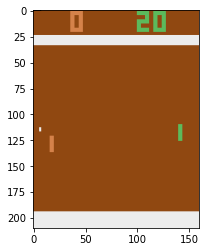

In [27]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = make_env('PongNoFrameskip-v4')

state = env.reset()

img = plt.imshow(env.render(mode='rgb_array')) # only call this once
while True:
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    state_v = torch.tensor(np.array([state], copy=False))
    q_vals = net(state_v).data.numpy()[0]
    action = np.argmax(q_vals)

    state, reward, done, _ = env.step(action)
    total_reward += reward
    
    if done:
        break